In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')

In [2]:
# the data is in a seperate directory so it will 
# only run once read in data set check the size
# df = pd.read_excel("../Data/ICTO_Datasets/ICTO_Datasets.xlsx")
# df.shape

In [3]:
# only run once converts to csv in same directory
# df.to_csv("../Data/ICTO_Datasets/ICTO_Datasets.csv")

In [4]:
# create a data frame of half of the random samples in the csv
df = pd.read_csv("../Data/ICTO_Datasets/ICTO_Datasets.csv").sample(frac=0.5)
df.shape

(11264, 11)

In [5]:
# number of rows should be half of original data set
df.shape

(11264, 11)

In [6]:
df = df.dropna() # drop null values in the data set
df.shape

(9739, 11)

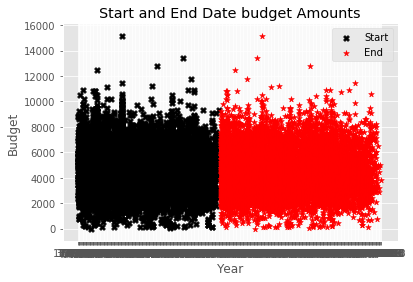

In [7]:
#plotting the data
plt.scatter(df['StartDate'], df['MinistryMonthlyBudgetAmount'], label='Start', 
            color='k', marker="X")
plt.scatter(df['EndDate'], df['MinistryMonthlyBudgetAmount'], label='End',
           color='r', marker="*")
plt.title("Start and End Date budget Amounts")
plt.xlabel("Year")
plt.ylabel("Budget")
plt.legend()
plt.show()

In [8]:
df.describe()

,Index,MemberAccountId,MinistryMonthlyBudgetAmount,Number_of_Household_Members
count,9739.000000,9.739000e+03,9739.000000,9739.000000
mean,11093.335558,4.022583e+18,4647.560633,1.853578
std,6526.063818,1.320601e+15,1806.077100,0.359023
min,0.000000,4.018520e+18,4.000000,1.000000
25%,5432.500000,4.022470e+18,3316.000000,2.000000
50%,11031.000000,4.023340e+18,4586.000000,2.000000
75%,16740.500000,4.023350e+18,5897.500000,2.000000
max,22525.000000,4.023400e+18,15136.000000,3.000000


In [9]:
df.head()

,Index,MemberAccountId,MinistryMonthlyBudgetAmount,StartDate,EndDate,Marital_Status,Number_of_Household_Members,City,State,PostalCode,Country
7930,7930,4.022470e+18,5485,3/1/2013,12/31/2013,Married,2,Erlanger,KY,41018,United States of America
2140,2140,4.019440e+18,4454,11/1/2011,4/30/2012,Married,2,Spanish Fort,AL,36527,United States of America
8921,8921,4.022520e+18,767,1/1/2013,12/31/2013,Single,1,Lexington,KY,40517,United States of America
1713,1713,4.019420e+18,6368,7/1/2015,2/29/2016,Married,2,Manheim,PA,17545,United States of America
91,91,4.019150e+18,1919,8/1/2011,7/31/2012,Divorced,1,Jacksonville,FL,32258-5434,United States of America


In [10]:
# drop unecessary columns
df = df.drop(['MemberAccountId', 'Index'], axis=1)
df.head()

,MinistryMonthlyBudgetAmount,StartDate,EndDate,Marital_Status,Number_of_Household_Members,City,State,PostalCode,Country
7930,5485,3/1/2013,12/31/2013,Married,2,Erlanger,KY,41018,United States of America
2140,4454,11/1/2011,4/30/2012,Married,2,Spanish Fort,AL,36527,United States of America
8921,767,1/1/2013,12/31/2013,Single,1,Lexington,KY,40517,United States of America
1713,6368,7/1/2015,2/29/2016,Married,2,Manheim,PA,17545,United States of America
91,1919,8/1/2011,7/31/2012,Divorced,1,Jacksonville,FL,32258-5434,United States of America


In [11]:
# delete all rows for where column country is not "United States of America"
indexNames = df[ df['Country'] != 'United States of America'].index
df.drop(indexNames, inplace=True)

df['Country'] != 'United States of America' - creates boolean series depending on values of Country
Index(['Country'], dtype='object') - gives index object containing index label where
Country does not have value 'United States of America'
 df.drop( df[df['Country'] != 'United States of America'].index, inplace=True) - deletes all rows 
that are not equal to United States of America in Country column

In [12]:
df.shape

(8900, 9)

Read out the column of the data set that has the zip codes 
We will manipulate it so that the zip codes are the proper data type for visualization
Dealing with zip codes, 
Our zip codes aren't numerical, they are categories for each area 

In [13]:
# second way to read in data from csv,
# uses same random sampling technique to read in data
# but we are changing the data types of the zip code from numerical to categorical
field = ['PostalCode']
df_zip = pd.read_csv('../Data/ICTO_Datasets/ICTO_Datasets.csv', usecols=field)
df_zip.head()

,PostalCode
0,92118
1,60173
2,60173
3,29630
4,29630


In [14]:
df_zip = df_zip.astype('str')

In [17]:
df.PostalCode.astype('str')
df.head()

,MinistryMonthlyBudgetAmount,StartDate,EndDate,Marital_Status,Number_of_Household_Members,City,State,PostalCode,Country
7930,5485,3/1/2013,12/31/2013,Married,2,Erlanger,KY,41018,United States of America
2140,4454,11/1/2011,4/30/2012,Married,2,Spanish Fort,AL,36527,United States of America
8921,767,1/1/2013,12/31/2013,Single,1,Lexington,KY,40517,United States of America
1713,6368,7/1/2015,2/29/2016,Married,2,Manheim,PA,17545,United States of America
91,1919,8/1/2011,7/31/2012,Divorced,1,Jacksonville,FL,32258-5434,United States of America


In [16]:
df.to_csv('../Data/ICTO_Datasets/cleaned_ICTO_Datasets.csv')